## This example shows Simulated Anealing on the benchmark data. 
http://decsai.ugr.es/~casillas/fmlib/ele2-4-1056.html

In [1]:
import numpy as np
import csv
import os
import sys
import matplotlib.pyplot as plt

# add path of needed code
sys.path.append(os.getcwd()+'/Code/')

from Fuzzification import cluster, scale
import FIS

%matplotlib inline

In [2]:
def read_elec_data(path, file):
    '''
    Reads in the data and returns it
    as a float type numpy array
    '''
    data_train= []
    with open(path+file) as file:
        reader = file.readlines()
        for row in reader:
            row = row.split()
            data_train.append([float(x) for x in row])
    return np.array(data_train)

def read_gas_data(path, file):
    '''
    Reads in the gas data and returns it
    as a float type numpy array.
    Formats are in csv and the first two
    columns (row ID and date) are removed
    '''
    data_train= []
    with open(path+file+'.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            try:
                data_train.append([float(x) for x in row[2:]])
            except: 
                header = row
                print(header[2:])
                ValueError
    return np.array(data_train)

In [117]:
path = 'Data/elec/'
file = 'ele2-4-1056-5.tra'
data = read_elec_data(path, file)
# The target column of your data
target_col = -1 # last column

In [143]:
# specify overlap of your sets, or the variance of the gaussian
overlap = 0.01
# Gaussian, triangle or trapezoid
mf = 'Gaussian'
# number of clusters per feature
Ncentroids = [10, 15, 25, 25, 45]
# A name for the FIS file
FIS_name='Demo_WM_elec'

## First test without SA

In [144]:
# train the FIS 
FIS.train(FIS_name, data, target_col, mf, Ncentroids, overlap)

In [145]:
# read in the trained FIS
method, mf, overlap, target_centroids, feature_centroids, RB = FIS.read(FIS_name +'.FIS')

In [146]:
# test the trained fis
path = 'Data/elec/'
file = 'ele2-4-1056-5.tst'
test_data = read_elec_data(path, file)

In [147]:
RMSE, MAE, _ = FIS.test(test_data, mf, overlap, target_centroids, feature_centroids, RB, target_col)
print('The RMSE is: ', RMSE)
print('The MAE is: ' , MAE)
print('The number of rules is ', len(RB))

('The RMSE is: ', 131.29436424173034)
('The MAE is: ', 84.651633317499844)
('The number of rules is ', 225)


## Test with SA, with a rule reduction of 20%

In [155]:
# specify SA properties
sa_alpha = 0.8
sa_flag = True
sa_iterations = 200
sa_plot = True
# A name for the FIS file
FIS_name='Demo_SA_elec'

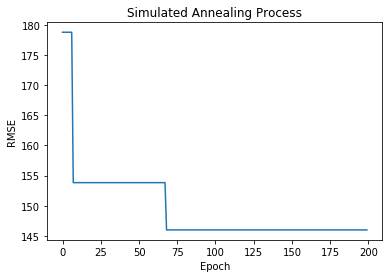

In [156]:
# train the FIS 
FIS.train(FIS_name, data, target_col, mf, Ncentroids, overlap, 
          alpha = sa_alpha , sa = sa_flag, iterations = sa_iterations, sa_plot = sa_plot)

In [157]:
# read in the trained FIS
method, mf, overlap, target_centroids, feature_centroids, RB = FIS.read(FIS_name +'.FIS')

In [158]:
RMSE, MAE, _ = FIS.test(test_data, mf, overlap, target_centroids, feature_centroids, RB, target_col)
print('The RMSE is: ', RMSE)
print('The MAE is: ' , MAE)
print('The number of rules is ' , len(RB))

('The RMSE is: ', 223.8113941415605)
('The MAE is: ', 124.82971727965916)
('The number of rules is ', 180)
